In [1]:
# import required modules
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, classification_report

In [2]:
# load the dataset
data = pd.read_csv("../Data/train.csv")

In [3]:
# display the summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [4]:
# display the descriptive statistics of the data
data.describe(include=['number'])

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [5]:
# print the shape of the data
data.shape

(165034, 14)

In [6]:
# display the first five rows in the data
data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [7]:
# check for missing values
data.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# check for duplicates
print("Count of duplicated entries:", data.duplicated().sum())

Count of duplicated entries: 0


In [ ]:
# display the number of unique geographies in dataset
print("Number of unique Geography:", len(data["Geography"].unique()))

Number of unique Geography: 3


In [10]:
# display the number of unique genders in the dataset
print("Number of unique Gender:", len(data["Gender"].unique()))

Number of unique Gender: 2


In [11]:
# display the unique genders
print("Unique genders in dataset:")
for gender in data["Gender"].unique():
  print(gender)

Unique genders in dataset:
Male
Female


In [12]:
# display the unique geographies
print("Unique Geography in dataset:")
for gender in data["Geography"].unique():
  print(gender)

Unique Geography in dataset:
France
Spain
Germany


In [13]:
# function to plot the count plot to identify the relation between Exited and other variables.
def count_plot(column, data):
  sns.countplot(data = data, x = column, hue='Exited')
  plt.title(f'Distribution of {column} in Dataset')
  plt.show()

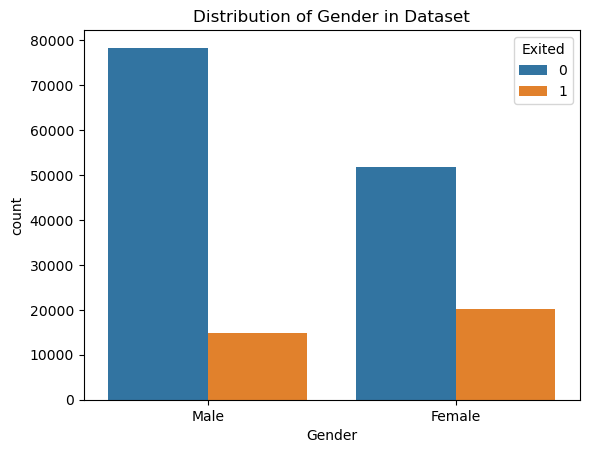

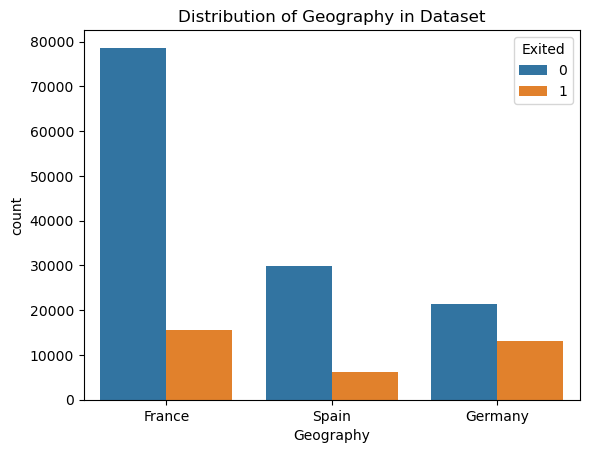

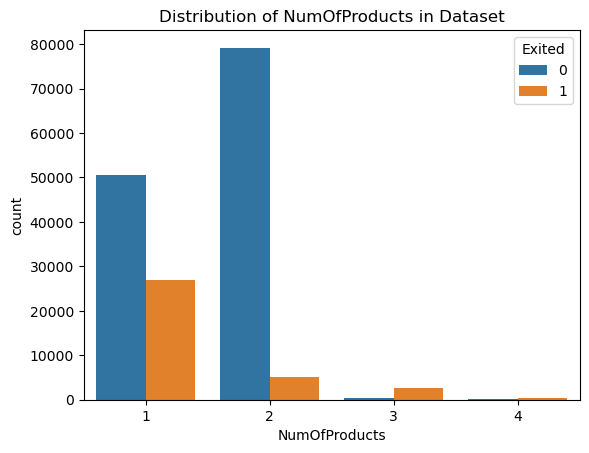

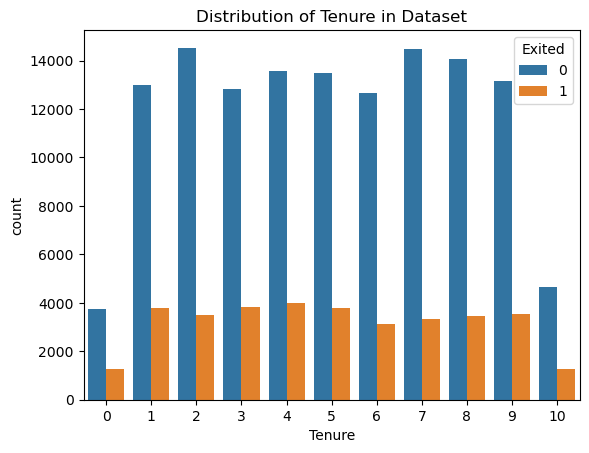

In [14]:
# plot the count plot for the selected variables.
cols = ['Gender', 'Geography', 'NumOfProducts', 'Tenure']
for col in cols:
  count_plot(col, data)

In [15]:
# function to plot the count plot to identify the relation between Exited and other nominal variables.
def count_plot_binary(column, data):
  sns.countplot(data = data, x = column, hue='Exited')
  plt.title(f'Distribution of {column} in Dataset')
  plt.xticks([0,1], ['No', 'Yes'])
  plt.show()

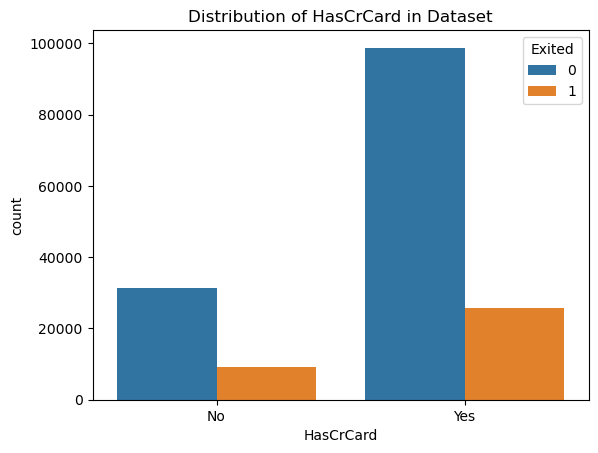

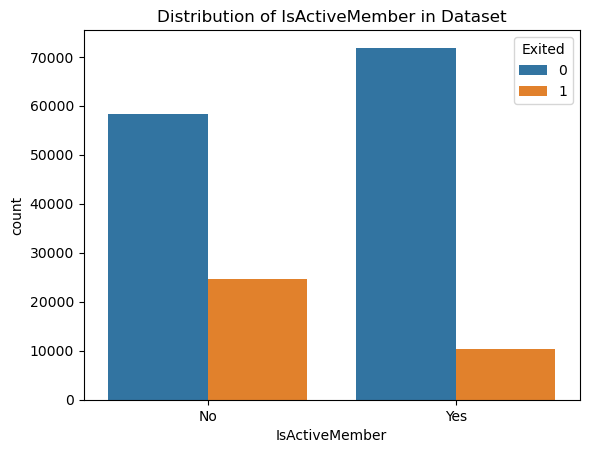

In [16]:
# plot the count plot for the selected variables.
cols = ['HasCrCard','IsActiveMember']
for col in cols:
  count_plot_binary(col, data)

In [17]:
# function to plot the histogram for the selected variables
def hist_plot(column, data):
  plt.figure(figsize=(12, 6))
  plt.hist(data[column], bins=30, color='skyblue', edgecolor='black')
  plt.title(f'Histogram of {column} in Dataset')
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

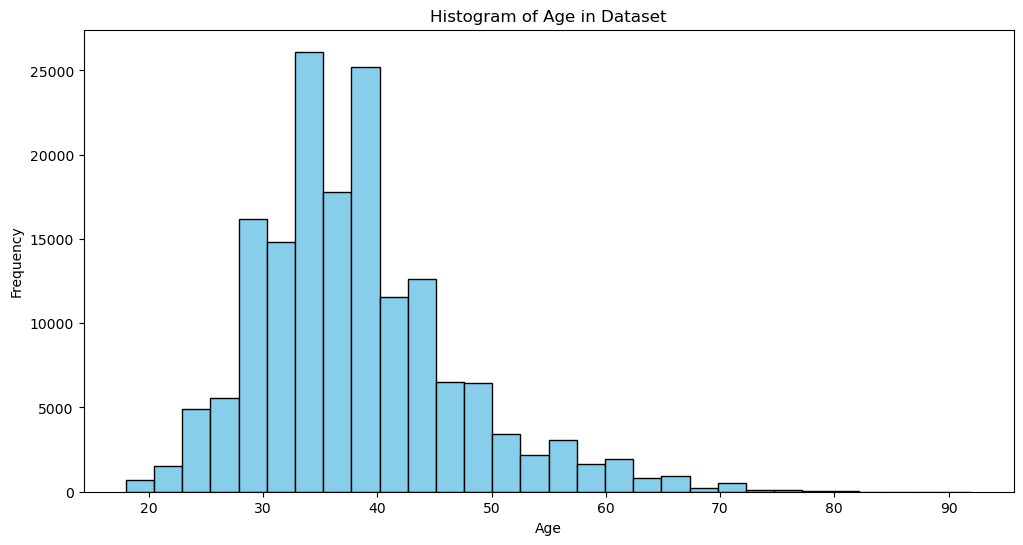

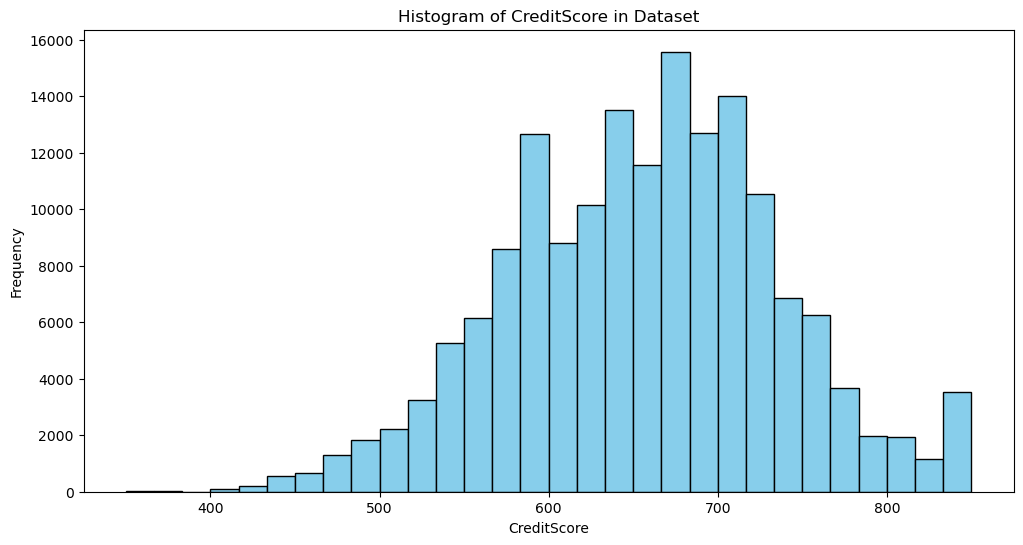

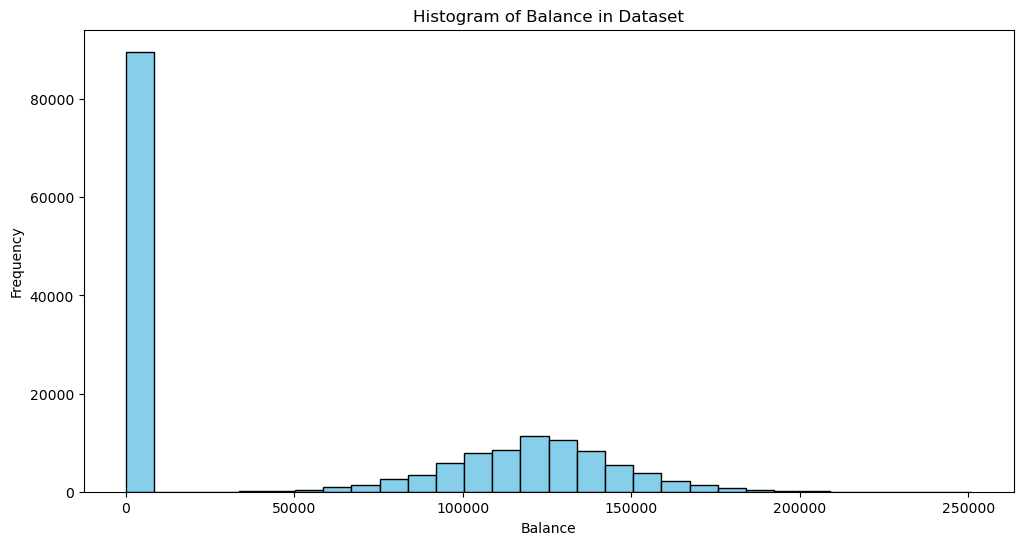

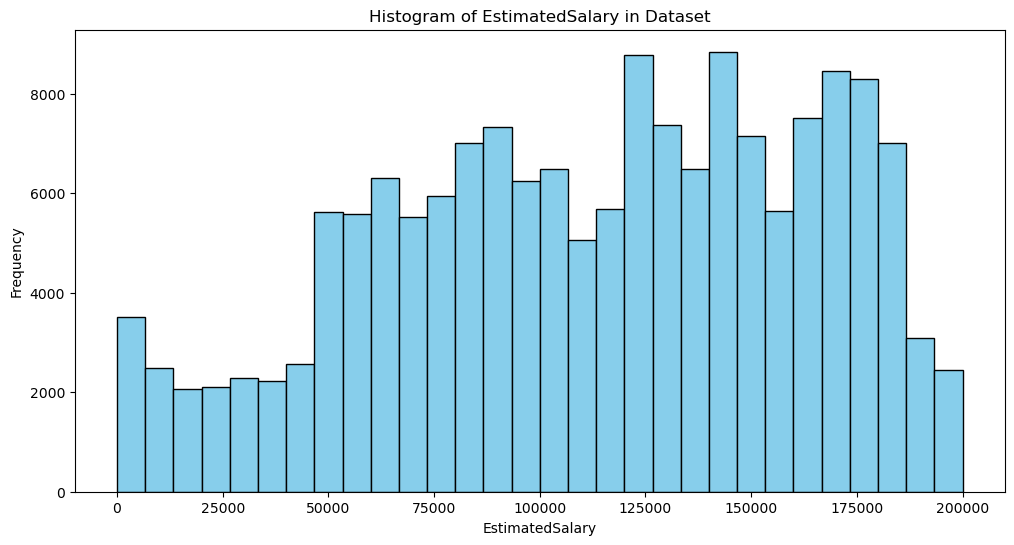

In [18]:
# plot the histogram for the selected variables
cols = ['Age','CreditScore', 'Balance', 'EstimatedSalary']
for col in cols:
  hist_plot(col, data)

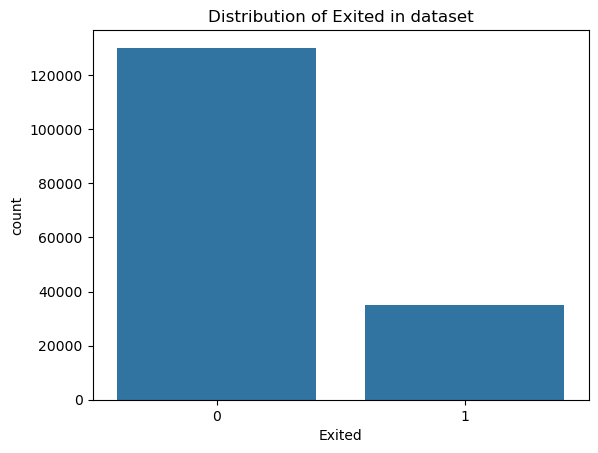

In [19]:
# display the distribution of exited using countplot
sns.countplot(data = data, x = 'Exited')
plt.title(f'Distribution of Exited in dataset')
plt.show()

In [20]:
# function to visualize the relation between Exited column and other columns
def box_plot(data, x, y):
  plt.figure(figsize=(10, 6))
  sns.boxplot(data = data, x = x, y = y)
  plt.title(f'Box plot: {y} Vs. Exited')
  plt.xticks([0, 1], ['No', 'Yes'])
  plt.show()

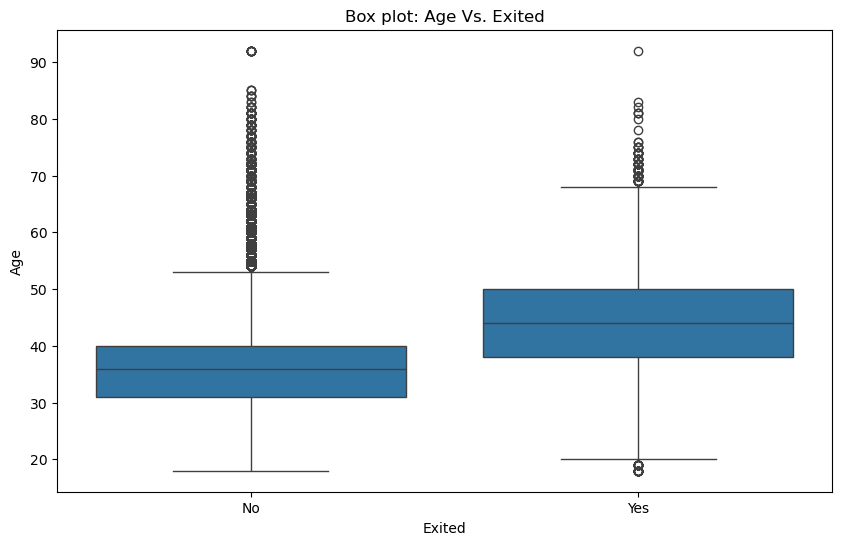

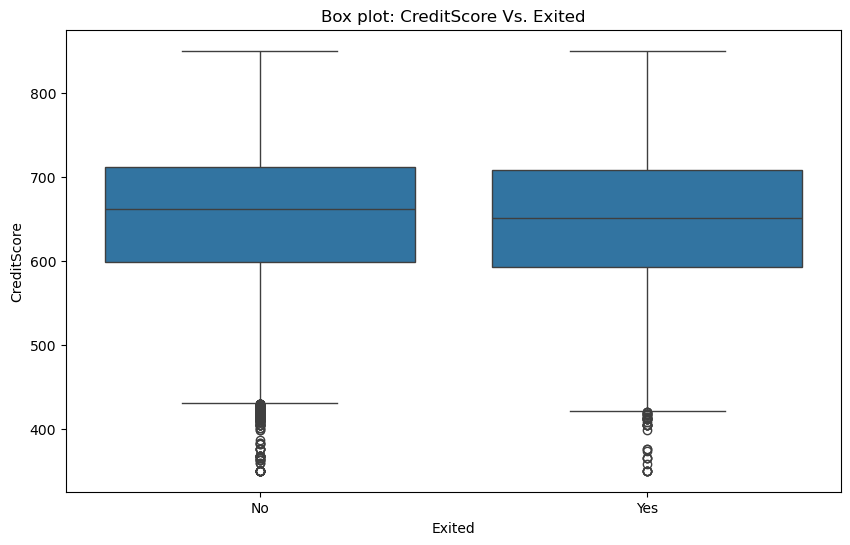

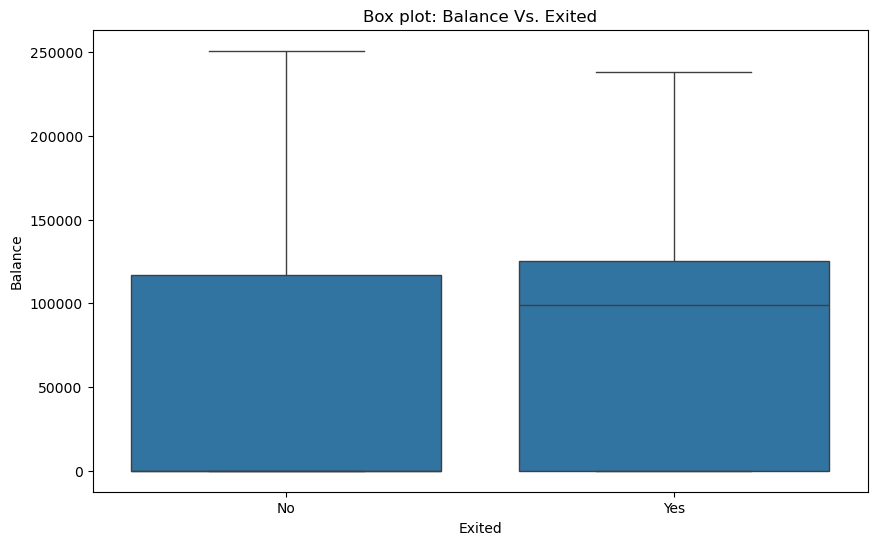

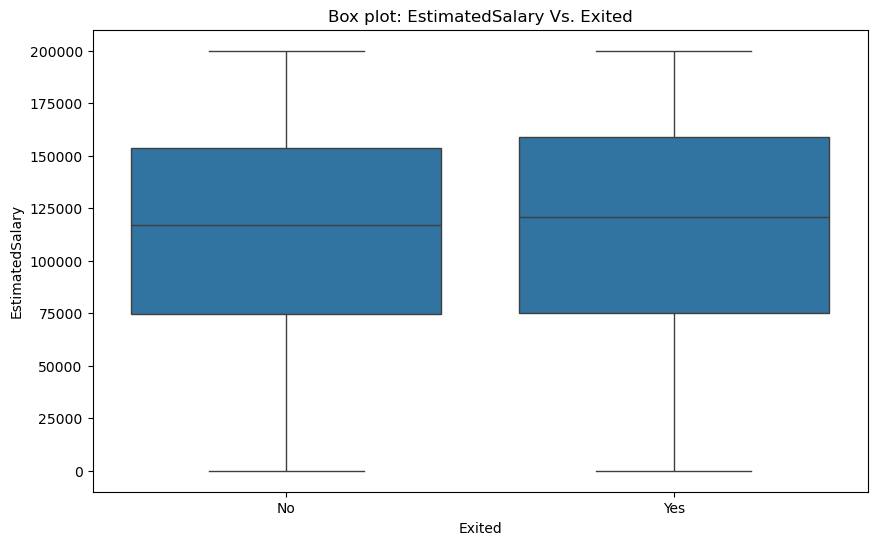

In [21]:
# display the boxplot for the selected columns
cols = ['Age','CreditScore', 'Balance', 'EstimatedSalary']
for col in cols:
  box_plot(data, 'Exited', col)

In [22]:
# drop the unwanted columns for model
data = data.drop(['CustomerId', 'Surname', 'id'], axis=1)

In [23]:
# display the first five columns in the data
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [24]:
# convert the categorial columns into numeric
df_data_enc = pd.get_dummies(data, columns=['Geography', 'Gender'])

In [25]:
# display the first five columns in the data
df_data_enc.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,True,False,False,False,True
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,True,False,False,False,True
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,True,False,False,False,True
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,True,False,False,False,True
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,False,True,False,True


In [26]:
# move the position of the target variable exited to the last
df_data_enc = pd.concat([df_data_enc.loc[:, df_data_enc.columns != 'Exited'], df_data_enc['Exited']], axis=1)

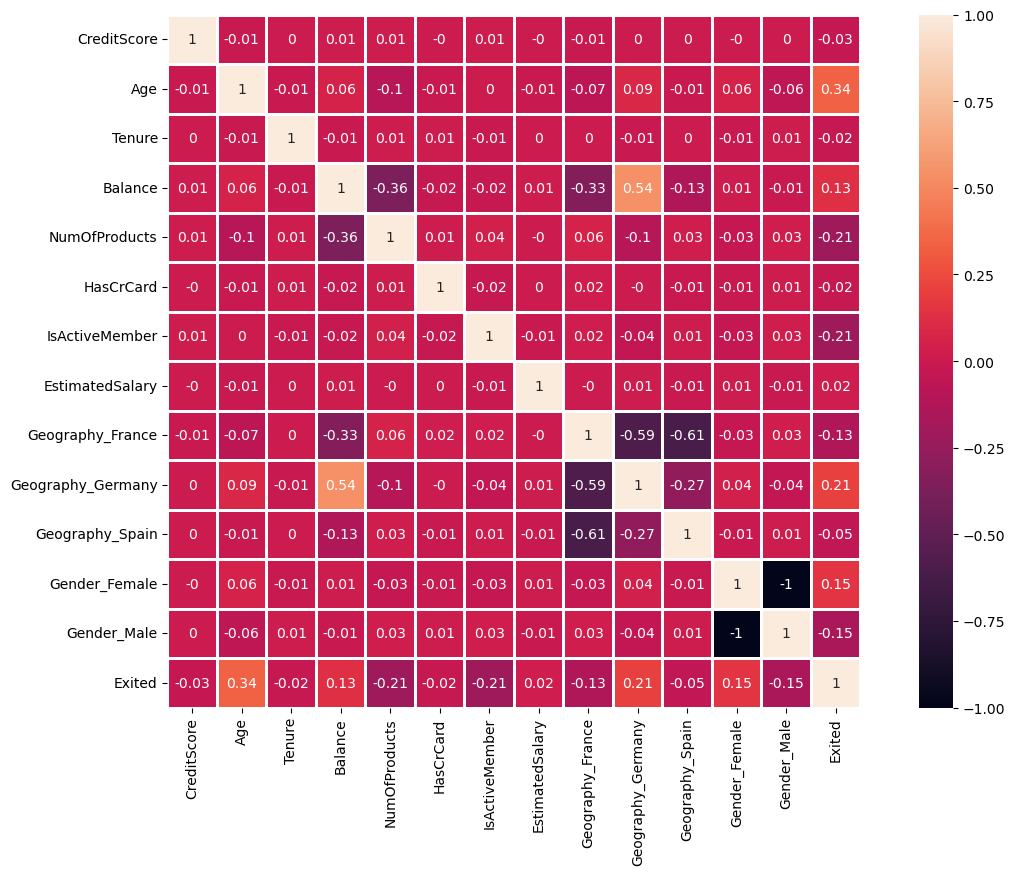

In [27]:
# display the correlation matrix
plt.figure(figsize=(15, 9))
sns.heatmap(df_data_enc.corr().round(2),annot=True, square=True, linewidths=1)
plt.show()

In [28]:
# display the correlation values in sorted order
cor_exited = abs(df_data_enc.corr()['Exited']).sort_values(ascending=False)
cor_exited = cor_exited[cor_exited.index != 'Exited']
print(cor_exited)

Age                  0.340768
NumOfProducts        0.214554
Geography_Germany    0.211054
IsActiveMember       0.210237
Gender_Female        0.146442
Gender_Male          0.146442
Geography_France     0.130797
Balance              0.129743
Geography_Spain      0.051175
CreditScore          0.027383
HasCrCard            0.022141
Tenure               0.019565
EstimatedSalary      0.018827
Name: Exited, dtype: float64


In [29]:
# display the column and its correlation if the correlation value > 0.10
high_corr_val = cor_exited[cor_exited > 0.10]
print(high_corr_val)

Age                  0.340768
NumOfProducts        0.214554
Geography_Germany    0.211054
IsActiveMember       0.210237
Gender_Female        0.146442
Gender_Male          0.146442
Geography_France     0.130797
Balance              0.129743
Name: Exited, dtype: float64


In [30]:
# split the data into features and target
X = df_data_enc[high_corr_val.index]
y = df_data_enc['Exited']

In [31]:
# perform Synthetic Minority Oversampling to balance the data
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

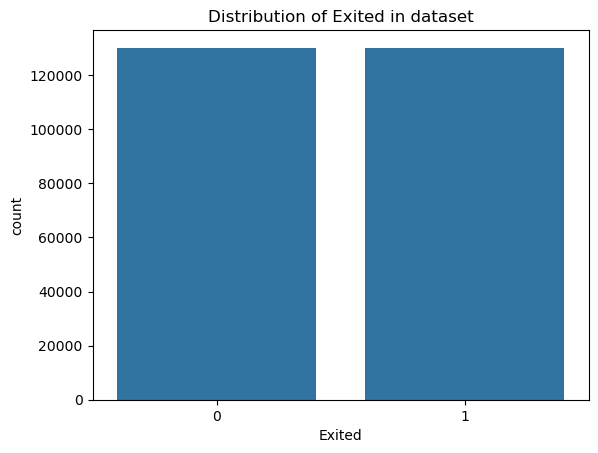

In [32]:
# display the distribution of exited using countplot
sns.countplot(x = y)
plt.title(f'Distribution of Exited in dataset')
plt.show()

In [33]:
# split the data into training and testing set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# display the selected columns for modeling
for columns in X_train.keys():
  print(columns)

Age
NumOfProducts
Geography_Germany
IsActiveMember
Gender_Female
Gender_Male
Geography_France
Balance


In [35]:
# display the shape of the training dataset
X_train.shape, y_train.shape

((208180, 8), (208180,))

In [36]:
# display the shape of the testing dataset
X_val.shape, y_val.shape

((52046, 8), (52046,))

## **Random Forest:**

In [37]:
# build the random forest model
rf_model = RandomForestClassifier(random_state = 42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Calculate and display the accuracy and auc roc score of the model
y_pred_rf = rf_model.predict(X_val)
rf_acc = accuracy_score(y_val, y_pred_rf)
rf_auc_roc = roc_auc_score(y_val, rf_model.predict_proba(X_val)[:, 1])
print("Random Forest Model Accuracy:", rf_acc)
print("Random Forest Model AUC ROC Score:", rf_auc_roc)

Random Forest Model Accuracy: 0.8561849133458863
Random Forest Model AUC ROC Score: 0.929230292284643


In [39]:
# function to plot the roc curve for the model.
def plot_roc_curve(model, model_name):
  fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
  auc_score = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f'{model_name} Model ROC Curve (AUC = %0.4f)' % auc_score)
  plt.plot([0, 1], [0, 1], color='red', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'{model_name} Model ROC Curve')
  plt.legend(loc='best')
  plt.show()

In [40]:
# display the classification report of the model
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86     26008
           1       0.86      0.85      0.86     26038

    accuracy                           0.86     52046
   macro avg       0.86      0.86      0.86     52046
weighted avg       0.86      0.86      0.86     52046



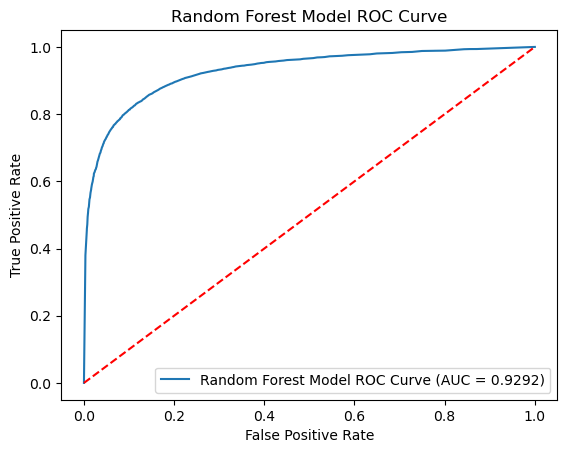

In [41]:
# plot the roc curve of the model
plot_roc_curve(rf_model, 'Random Forest')

## **eXtreme Gradient Boosting:**

In [42]:
# build the eXtreme Gradient Boosting model
xgb_model = XGBClassifier(random_state = 42)

# Train the model using the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [43]:
# Calculate and display the accuracy and auc roc score of the model
y_pred_xgb = xgb_model.predict(X_val)
xgb_acc = accuracy_score(y_val, y_pred_xgb)
xgb_auc_roc = roc_auc_score(y_val, xgb_model.predict_proba(X_val)[:, 1])
print("Extreme Gradient Boosting Classifier Model Accuracy:", xgb_acc)
print("Extreme Gradient Boosting Classifier Model AUC ROC Score:", xgb_auc_roc)

Extreme Gradient Boosting Classifier Model Accuracy: 0.8655996618376052
Extreme Gradient Boosting Classifier Model AUC ROC Score: 0.9382191673922662


In [44]:
# display the classification report of the model
print(classification_report(y_val, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     26008
           1       0.88      0.84      0.86     26038

    accuracy                           0.87     52046
   macro avg       0.87      0.87      0.87     52046
weighted avg       0.87      0.87      0.87     52046



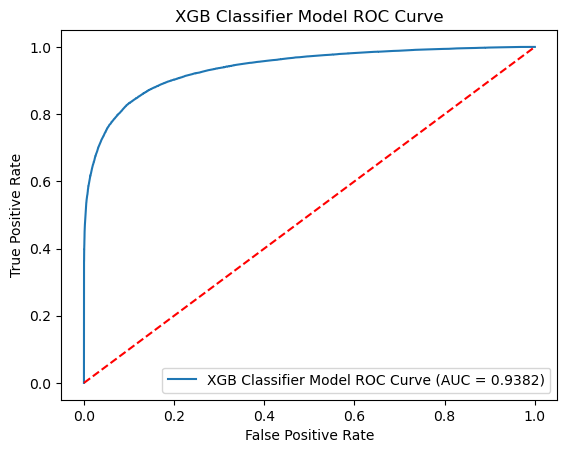

In [45]:
# plot the roc curve of the model
plot_roc_curve(xgb_model, 'XGB Classifier')

## **Histogram-based Gradient Boosting:**

In [46]:
# build the Histogram-based Gradient Boosting model
hgb_model = HistGradientBoostingClassifier(random_state = 42)

# Train the model using the training data
hgb_model.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=42)

In [47]:
# Calculate and display the accuracy and auc roc score of the model
y_pred_hgb = hgb_model.predict(X_val)
hgb_acc = accuracy_score(y_val, y_pred_hgb)
hgb_auc_roc = roc_auc_score(y_val, hgb_model.predict_proba(X_val)[:, 1])
print("Hist Gradient Boosting Classifier Model Accuracy:", hgb_acc)
print("Hist Gradient Boosting Classifier Model AUC ROC Score:", hgb_auc_roc)

Hist Gradient Boosting Classifier Model Accuracy: 0.8637551396841255
Hist Gradient Boosting Classifier Model AUC ROC Score: 0.9363656110562588


In [48]:
# display the classification report of the model
print(classification_report(y_val, y_pred_hgb))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     26008
           1       0.88      0.84      0.86     26038

    accuracy                           0.86     52046
   macro avg       0.86      0.86      0.86     52046
weighted avg       0.86      0.86      0.86     52046



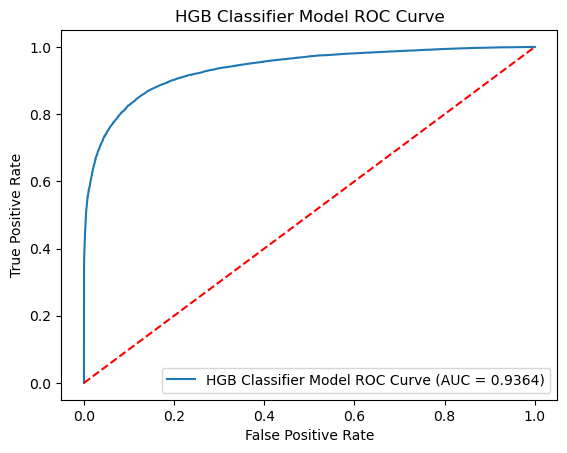

In [49]:
# plot the roc curve of the model
plot_roc_curve(hgb_model, 'HGB Classifier')

## **Gaussian Naive Bayes:**

In [50]:
# build the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model using the training data
gnb_model.fit(X_train, y_train)

GaussianNB()

In [51]:
# Calculate and display the accuracy and auc roc score of the model
y_pred_gnb = gnb_model.predict(X_val)
gnb_acc = accuracy_score(y_val, y_pred_gnb)
gnb_auc_roc = roc_auc_score(y_val, gnb_model.predict_proba(X_val)[:, 1])
print("Gaussian Naive Bayes Classifier Model Accuracy:", gnb_acc)
print("Gaussian Naive Bayes Classifier Model AUC ROC Score:", gnb_auc_roc)

Gaussian Naive Bayes Classifier Model Accuracy: 0.7229181877569842
Gaussian Naive Bayes Classifier Model AUC ROC Score: 0.7795702809978714


In [52]:
# display the classification report of the model
print(classification_report(y_val, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73     26008
           1       0.74      0.68      0.71     26038

    accuracy                           0.72     52046
   macro avg       0.72      0.72      0.72     52046
weighted avg       0.72      0.72      0.72     52046



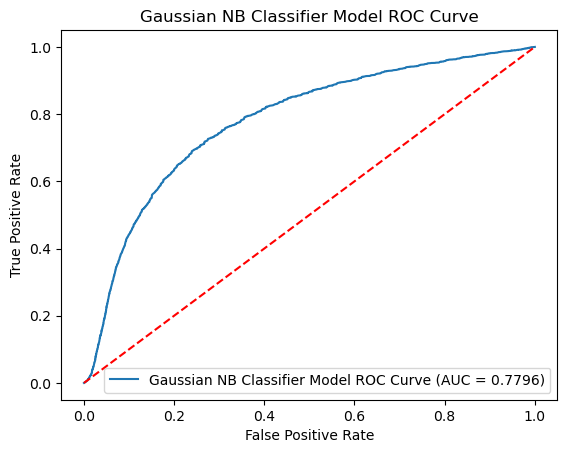

In [53]:
# plot the roc curve of the model
plot_roc_curve(gnb_model, 'Gaussian NB Classifier')

## **Decision Tree:**

In [54]:
# build the Decision Tree model
dt_model = DecisionTreeClassifier(random_state = 42)

# Train the model using the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [55]:
# Calculate and display the accuracy and auc roc score of the model
y_pred_dt = dt_model.predict(X_val)
dt_acc = accuracy_score(y_val, y_pred_dt)
dt_auc_roc = roc_auc_score(y_val, dt_model.predict_proba(X_val)[:, 1])
print("Decision Tree Classifier Model Accuracy:", dt_acc)
print("Decision Tree Classifier Model AUC ROC Score:", dt_auc_roc)

Decision Tree Classifier Model Accuracy: 0.8484417630557584
Decision Tree Classifier Model AUC ROC Score: 0.8679118514503884


In [56]:
# display the classification report of the model
print(classification_report(y_val, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     26008
           1       0.85      0.85      0.85     26038

    accuracy                           0.85     52046
   macro avg       0.85      0.85      0.85     52046
weighted avg       0.85      0.85      0.85     52046



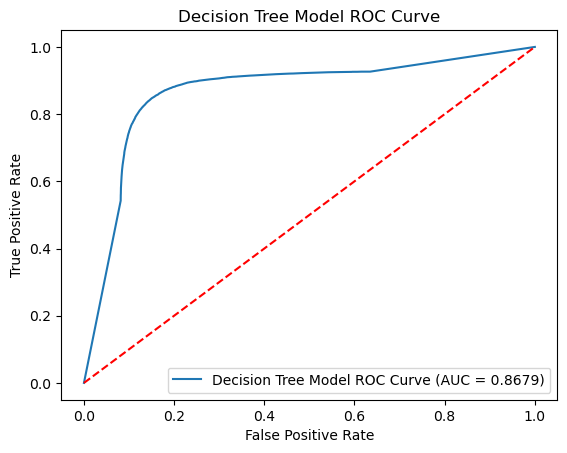

In [57]:
# plot the roc curve of the model
plot_roc_curve(dt_model, 'Decision Tree')

In [58]:
# store the model name, AUC roc score, and accuracy in the data frame
res_df = pd.DataFrame({
    'Model': ['Random Forest', 'Extreme Gradient Boosting', 'Hist Gradient Boosting', 'Gaussian Naive Bayes', 'Decision Tree'],
    'AUC ROC': [round(rf_auc_roc, 4), round(xgb_auc_roc, 4), round(hgb_auc_roc, 4), round(gnb_auc_roc, 4), round(dt_auc_roc, 4)],
    'Accuracy': [round(rf_acc, 4), round(xgb_acc, 4), round(hgb_acc, 4), round(gnb_acc, 4), round(dt_acc, 4)]
    })

# display the result dataframe
res_df

,Model,AUC ROC,Accuracy
0,Random Forest,0.9292,0.8562
1,Extreme Gradient Boosting,0.9382,0.8656
2,Hist Gradient Boosting,0.9364,0.8638
3,Gaussian Naive Bayes,0.7796,0.7229
4,Decision Tree,0.8679,0.8484


In [59]:
# store the model name, TPR, FPR, and auc roc in the data frame.
auc_roc_df = pd.DataFrame({
    'Model': ['Random Forest', 'Extreme Gradient Boosting',
              'Hist Gradient Boosting', 'Gaussian Naive Bayes', 'Decision Tree']})
fpr_rf, tpr_rf, _ = roc_curve(y_val, rf_model.predict_proba(X_val)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, xgb_model.predict_proba(X_val)[:, 1])
fpr_hgb, tpr_hgb, _ = roc_curve(y_val, hgb_model.predict_proba(X_val)[:, 1])
fpr_gnb, tpr_gnb, _ = roc_curve(y_val, gnb_model.predict_proba(X_val)[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(y_val, dt_model.predict_proba(X_val)[:, 1])
auc_roc_df['TPR'] = [tpr_rf, tpr_xgb, tpr_hgb, tpr_gnb, tpr_dt]
auc_roc_df['FPR'] = [fpr_rf, fpr_xgb, fpr_hgb, fpr_gnb, fpr_dt]
auc_roc_df['AUC ROC'] = [round(rf_auc_roc, 4), round(xgb_auc_roc, 4), round(hgb_auc_roc, 4),
                         round(gnb_auc_roc, 4), round(dt_auc_roc, 4)]
auc_roc_df.set_index('Model', inplace=True)


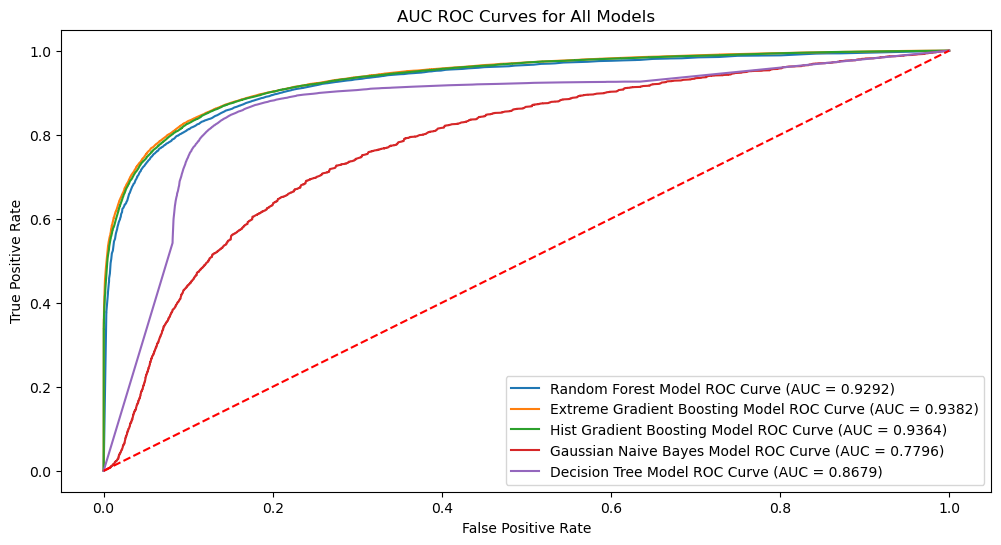

In [60]:
# display the auc roc score for all models in a single plot
plt.figure(figsize=(12, 6))
for model in auc_roc_df.index:
  plt.plot(auc_roc_df['FPR'][model], auc_roc_df['TPR'][model],
           label=f'{model} Model ROC Curve (AUC = %0.4f)' % auc_roc_df['AUC ROC'][model])
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Curves for All Models')
plt.legend(loc='best')
plt.show()


In [62]:
# Save a compressed pickle file
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)